## At the end of this lesson you will learn:

   - SVM for classification
   - SVM for regression (SVR)


### Types of Support Vector Machines:

 - **SVM for Classification**: SVM is used for classifying data points into different categories. It finds a hyperplane that best divides the data points of one class from another.

 - **SVM for Regression (Support Vector Regression - SVR)**: SVR predicts a continuous output variable. Instead of finding a hyperplane, it finds a hyper-tube in a high-dimensional space that best fits the data points.

SVM is a powerful and versatile algorithm, but it requires careful tuning of parameters like the kernel function and regularization parameter for optimal performance. Techniques like cross-validation and grid search are often used to find the best set of parameters for a specific problem.

## Suport Vector Machines for Classification

Let’s assume we have a set of points that belong to **two separate classes**. We want to separate those two classes in a way that allows us to correctly assign any future new points to one class or the other.

SVM algorithm attempts to **find a hyperplane** that separates these two classes with the highest possible margin. If classes are fully linearly separable, a hard-margin can be used. Then both classes will be perfectly differentiable through the hyperplane

Otherwise, it requires a soft-margin. Then allowing some misclassification.



By definition the SVM tries to **maximize the distance** between the hyperplane and the points of the different classes. This distance is better called **margin**

The nearest points from each class and the decision boundary (hyperplane) are denominated as **Support Vectors**



In the images below there are several possible hyperplanes.

 - Hyperplane called “H1” cannot accurately separate the two classes; hence, it is not a viable solution to our problem.

 - The “H2” hyperplane separates classes correctly. However, the margin between the hyperplane and the nearest blue and green points is tiny. Hence, there is a high chance of incorrectly classifying any future new points. E.g., the new grey point (x1=3, x2=3.6) would be assigned to the green class by the algorithm when it is obvious that it should belong to the blue class instead.

 - The “H3” hyperplane separates the two classes correctly and with the highest possible margin (yellow shaded area)

 - The “H4” hyperplane, in the soft margin image, treats the green point inside the margin as an outlier. Hence, the support vectors are the two green points **closer to the main group of green points**. This allows a larger margin to exist, increasing the model’s robustness.

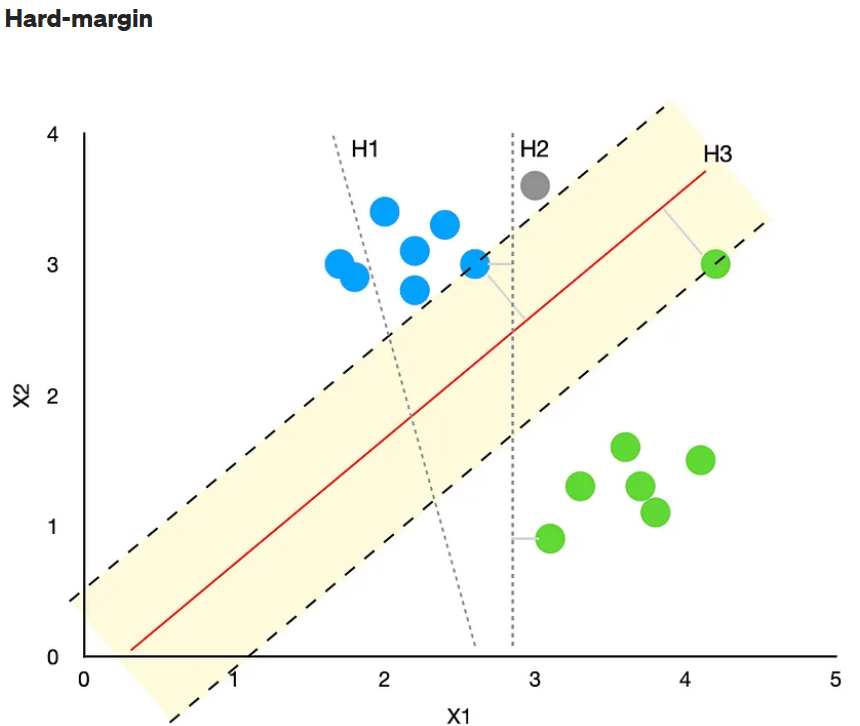

### Soft Margin

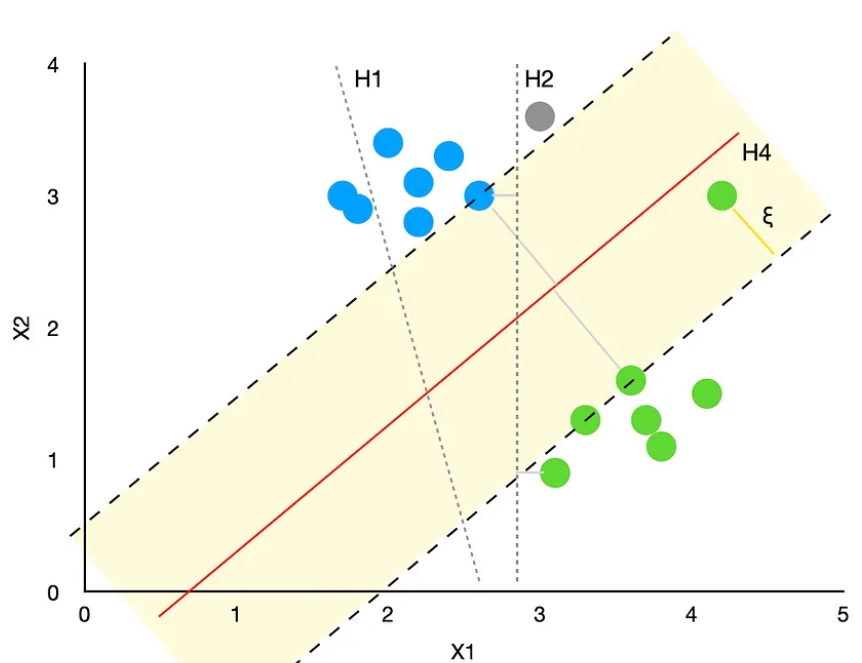

## SVM: The Kernel Trick

The examples above are quite simple, thus they are not very common in real world, although they are quite useful for understanding the algorithm

It is much more common to find non linearly separable problems, even allowing misclassifications.

In the image below we have ine example

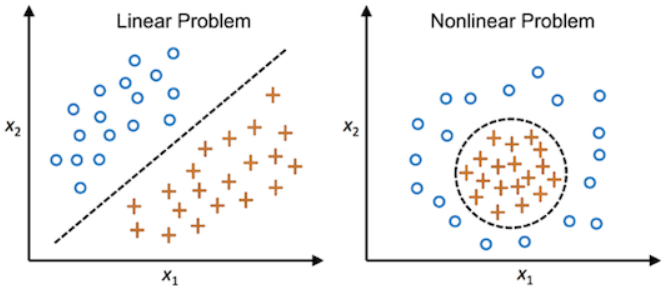

The solution for these problems is to transform the data.

SVM can efficiently perform a non-linear classification by implicitly **mapping the input data to a high-dimensional** feature space using a kernel function. Common kernel functions include Polynomial, Radial Basis Function (RBF), and Sigmoid.

In the example below we have created a new z-axis which is equal to $x^2 + y^2$

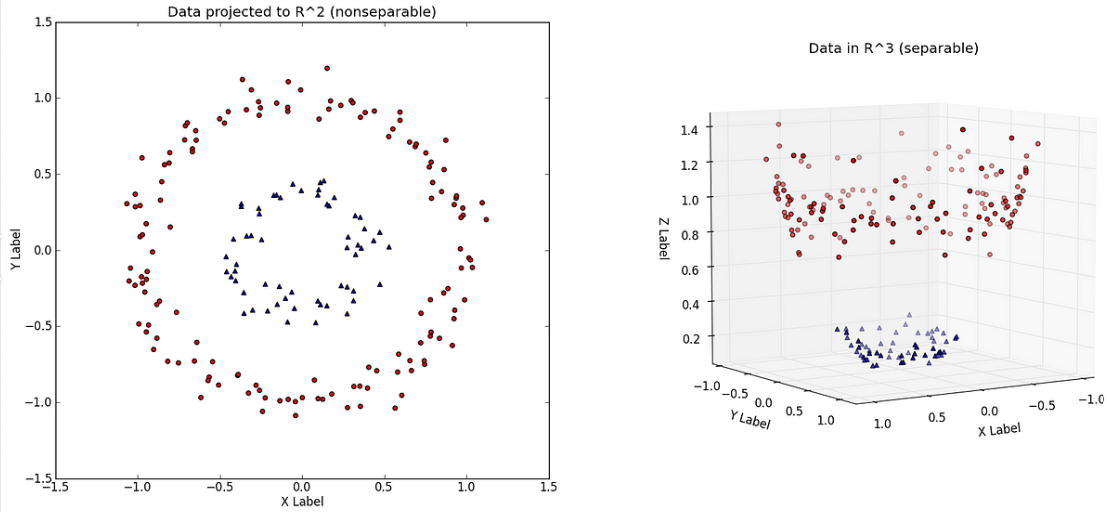

## Suport Vector Machines for Regression

A simple way to think about SVR is to imagine a tube with an estimated function (hyperplane) in the middle and boundaries on either side defined by ε. The algorithm's goal is to minimize the error by identifying a function that puts more of the original points inside the tube

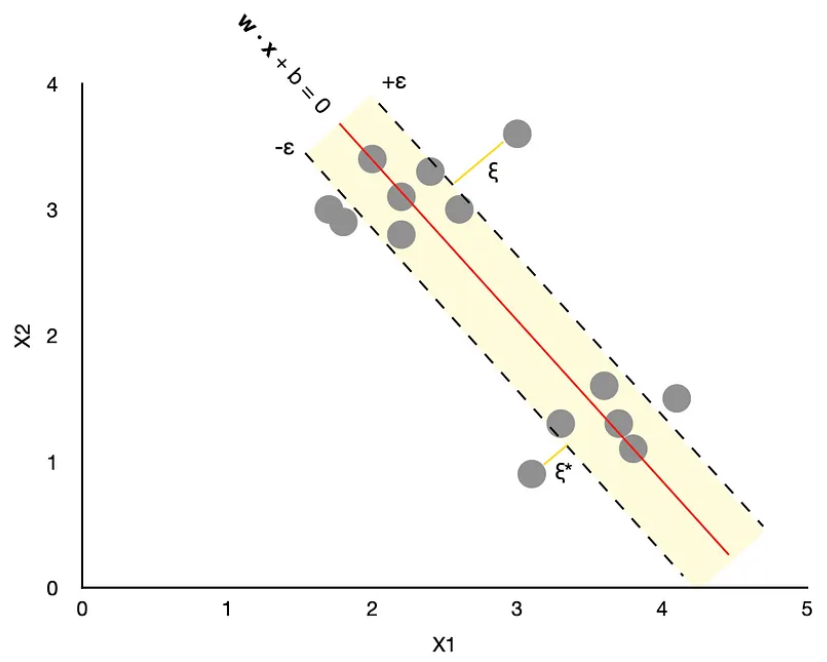

As well as with SVM, SVR uses the **kernel trick**. It takes the original non-linear problem and transforms it into a linear one, which is then handled by the algorithm in a higher-dimensional space.

## Regularization

Both algorithms need to be parametrized to increase their power. Each one has its own parameters that should be tune using Cross Validation



### SVM Regularization

In Support Vector Machines (SVM), both the parameters
$C$ and $γ$ are crucial in determining the model's behavior. Here's the difference between them:

1. Parameter $C$:

**Role**: $C$ parameter adds a penalty for each misclassified data point. If $C$ is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassifications. If $C$ is large, SVM tries to minimize the number of misclassified examples due to high penalty which results in a decision boundary with a smaller margin.

**Effect of Changing $C$**:

Smaller $C$ : Encourages a simpler decision boundary. May underfit the data if the problem is too complex.

Larger $C$ : Allows a more complex decision boundary. May overfit the data if the problem is not very complex.

Beware, while setting a high value for C is likely to lead to a better model performance on the training data, there is a high risk of overfitting the model, producing poor results on the test data.

-------

2. Parameter $γ$:

Role: $γ$ is the parameter of the radial basis function (RBF) kernel and controls the **shape of the decision boundary**. It defines how far the influence of a single training example reaches. Low values of $γ$ mean that the influence is 'far,' while high values mean the influence is 'close.'

**Effect of Changing $γ$**:

**Smaller $γ$**: Creates a larger similarity radius. The decision boundary will be smoother, and the model will consider points farther away from the decision boundary in the calculation of the decision.

**Larger $γ$**: Creates a smaller similarity radius. The decision boundary will be more complex, and the model will focus more on points close to the decision boundary.

In summary, $C$ is a regularization parameter that balances the trade-off between a smooth decision boundary and correctly classifying training points, while $γ$ is a kernel parameter that defines the influence of training examples on the decision boundary's shape.

The appropriate choice of $C$ and $γ$ often involves experimentation and tuning using techniques like grid search and cross-validation to find the values that result in the best model performance.

**Typical values**

0.0001 < $γ$ < 10

0.1 < $C$ < 100

### SVR Regularization


$C$ and $γ$ parameters work as in SVM for classification, the smaller their values, the more robust the model

$e$ (epsilon) parameter is defined as a margin of tolerance. It creates two boundaries above and below the hyperplane, the data points inside these boundaries are not considered errors and do not contribute to the loss function.

**Small $e$** will consider most part of the data points as wronlgy predicted, so the hyperplane will be more complex, leading in overfitting

**Large $e$** will allow more errors and will be less demanding, resulting in a more robust model.

**Typical values** for $e$ are 0.01, 0.1, 1 or 10


## SVM and SVR with Python

### SVM

In [ ]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix # for model evaluation metrics
from sklearn.svm import SVC # for Support Vector Classification model


import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import seaborn as sns
from tabulate import tabulate

In [ ]:
df0 = pd.read_csv('/content/sample_data/games.csv', sep = ';')
df0['rating_difference']=df0['white_rating']-df0['black_rating']
df0['white_win']=df0['winner'].apply(lambda x: 1 if x=='white' else 0)
df = df0[['rating_difference', 'turns','white_win']]
df.head(3)

,rating_difference,turns,white_win
0,309,13,1
1,61,16,0
2,-4,61,1


In [ ]:
X=df[['rating_difference', 'turns']]#
y=df['white_win']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head(3)

,rating_difference,turns
1477,150,32
564,-146,58
2073,277,47


In [ ]:
model = SVC(kernel='rbf', probability=True, C=0.1, gamma=0.0001)
SVC_model = model.fit(X_train, y_train)

In [ ]:
pred_labels_tr = SVC_model.predict(X_train)
pred_labels_ts = SVC_model.predict(X_test)

In [ ]:
print("Train set score (Accuracy) =", SVC_model.score(X_train, y_train).round(4))
print("Test set score (Accuracy) =", SVC_model.score(X_test, y_test).round(4))

conf_mat = confusion_matrix(y_test, SVC_model.predict(X_test))
print(tabulate(conf_mat,headers = ['pred win No','pred win Yes'], showindex = ['real win No','real win Yes'],
               tablefmt = 'fancy_grid'))

print(classification_report(y_test, SVC_model.predict(X_test)))

Train set score (Accuracy) = 0.6475
Test set score (Accuracy) = 0.6555
╒══════════════╤═══════════════╤════════════════╕
│              │   pred win No │   pred win Yes │
╞══════════════╪═══════════════╪════════════════╡
│ real win No  │          1431 │            593 │
├──────────────┼───────────────┼────────────────┤
│ real win Yes │           789 │           1199 │
╘══════════════╧═══════════════╧════════════════╛
              precision    recall  f1-score   support

           0       0.64      0.71      0.67      2024
           1       0.67      0.60      0.63      1988

    accuracy                           0.66      4012
   macro avg       0.66      0.66      0.65      4012
weighted avg       0.66      0.66      0.65      4012



<Axes: xlabel='rating_difference', ylabel='turns'>

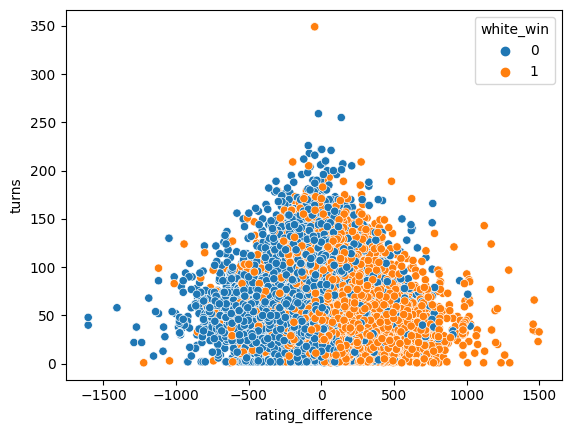

In [ ]:
sns.scatterplot(data = df, x = 'rating_difference', y = 'turns', hue = 'white_win')

In [ ]:
def Plot_3D(X, X_test, y_test, clf):

    # Specify a size of the mesh to be used
    mesh_size = 5
    margin = 1

    # # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)

    # Calculate predictions on grid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = px.scatter_3d(x=X_test['rating_difference'], y=X_test['turns'], z=y_test,
                     opacity=0.8, color_discrete_sequence=['black'])

    # Set figure title and colors
    fig.update_layout(#title_text="Scatter 3D Plot with SVM Prediction Surface",
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              )))
    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='SVM Prediction',
                              colorscale='RdBu', showscale=False,
                              contours = {"z": {"show": True, "start": 0.2, "end": 0.8, "size": 0.05}}))
    fig.show()

In [ ]:
Plot_3D(X, X_test, y_test, SVC_model)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



### SVR



In [ ]:
# Data Manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Sklearn
from sklearn.linear_model import LinearRegression # for building a linear regression model
from sklearn.svm import SVR # for building SVR model
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# Visualizations
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read in data
df = pd.read_csv('/content/sample_data/Real estate.csv', encoding='utf-8')


# Print Dataframe
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['X3 distance to the nearest MRT station']],
                                                    df['Y house price of unit area'], train_size = 0.8, random_state = 0)
X_train.head(3)

,X3 distance to the nearest MRT station
302,2288.0110
20,2275.8770
303,439.7105


In [ ]:
# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X_train, y_train)

# ------- Support Vector regression -------
model2 = SVR(kernel='rbf', C=100, epsilon=0.01) # set kernel and hyperparameters
svr = model2.fit(X_train, y_train)



In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_train, model2.predict(X_train)).round(4))
print("MSE: ", metrics.mean_squared_error(y_train, model2.predict(X_train)).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, model2.predict(X_train))).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_train, model2.predict(X_train)).round(4))
print("R2: ", metrics.r2_score(y_train, model2.predict(X_train)).round(4))

MAE:  6.1976
MSE:  84.2401
RMSE:  9.1782
MAPE:  0.1838
R2:  0.5506


In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, model2.predict(X_test)).round(4))
print("MSE: ", metrics.mean_squared_error(y_test, model2.predict(X_test)).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, model2.predict(X_test))).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, model2.predict(X_test)).round(4))
print("R2: ", metrics.r2_score(y_test, model2.predict(X_test)).round(4))

MAE:  5.6131
MSE:  57.7862
RMSE:  7.6017
MAPE:  0.161
R2:  0.6673


In [ ]:
def plot(df, model1, model2):
  # Create a scatter plot
  fig = px.scatter(df, x=df['X3 distance to the nearest MRT station'], y=df['Y house price of unit area'],
                  opacity=0.8, color_discrete_sequence=['black'])
  X = df['X3 distance to the nearest MRT station']
  # Predict y values for our set of X values
  x_range = np.linspace(X.min(), X.max(), 100)
  y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
  y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

  # Add a best-fit line
  fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
  fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
  fig.add_traces(go.Scatter(x=x_range, y=y_svr+10, name='+epsilon', line=dict(color='red', dash='dot')))
  fig.add_traces(go.Scatter(x=x_range, y=y_svr-10, name='-epsilon', line=dict(color='red', dash='dot')))

  # Change chart background color
  fig.update_layout(dict(plot_bgcolor = 'white'))

  # Update axes lines
  fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                  zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                  showline=True, linewidth=1, linecolor='black')

  fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                  zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                  showline=True, linewidth=1, linecolor='black')

  # Set figure title
  fig.update_layout(title=dict(text="House Price Based on Distance from the Nearest MRT",
                              font=dict(color='black')))
  # Update marker size
  fig.update_traces(marker=dict(size=3))

  fig.show()

plot(df, model1, model2)